# Mick Schumacher
<img src="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/image.img.1920.medium.jpg/1641824836549.jpg" width="300">

### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">


In [2]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [3]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [4]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

msc_laps <- lap_data %>%
            filter(driverId == 854)

# Filtering Lap Data for HAAS
haas_lap <- lap_data %>%
             filter(driverId %in% c(154, 821, 853))

# Season Analysis

In [5]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
1052,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



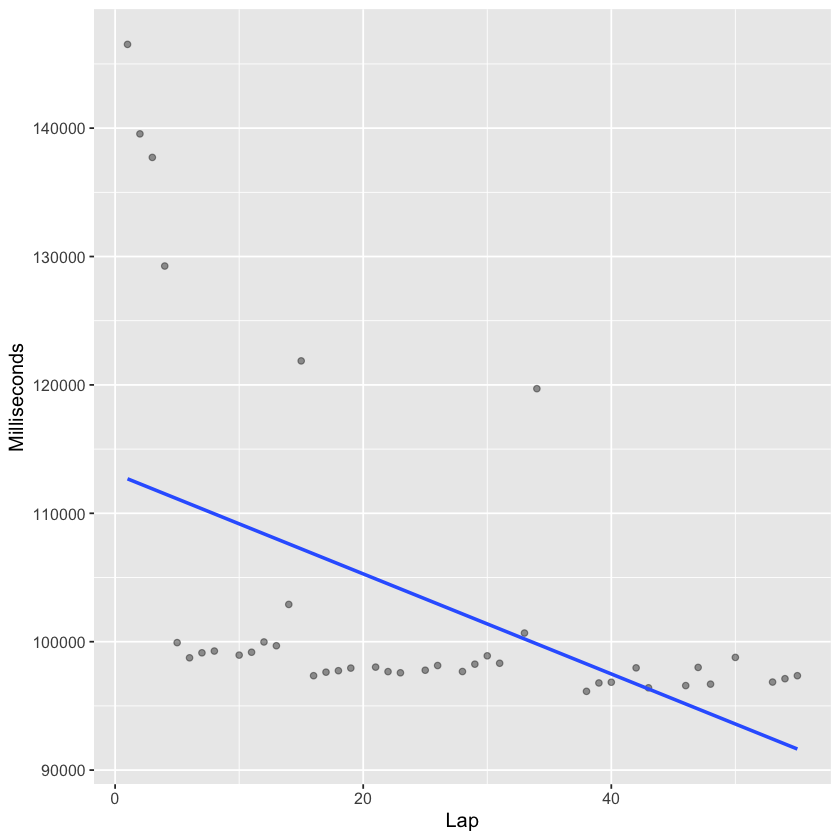

In [6]:
set.seed(2022)

#1. BAHRAIN 

ms_bahrain <- msc_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ms_bahrain_clean <- ms_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_bahrain_clean
ms_bahrain_clean_ID <- ms_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_bahrain_races <- msc_laps %>%
                    filter(raceId %in% ms_bahrain_clean_ID)

formulaone_split <- initial_split(ms_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



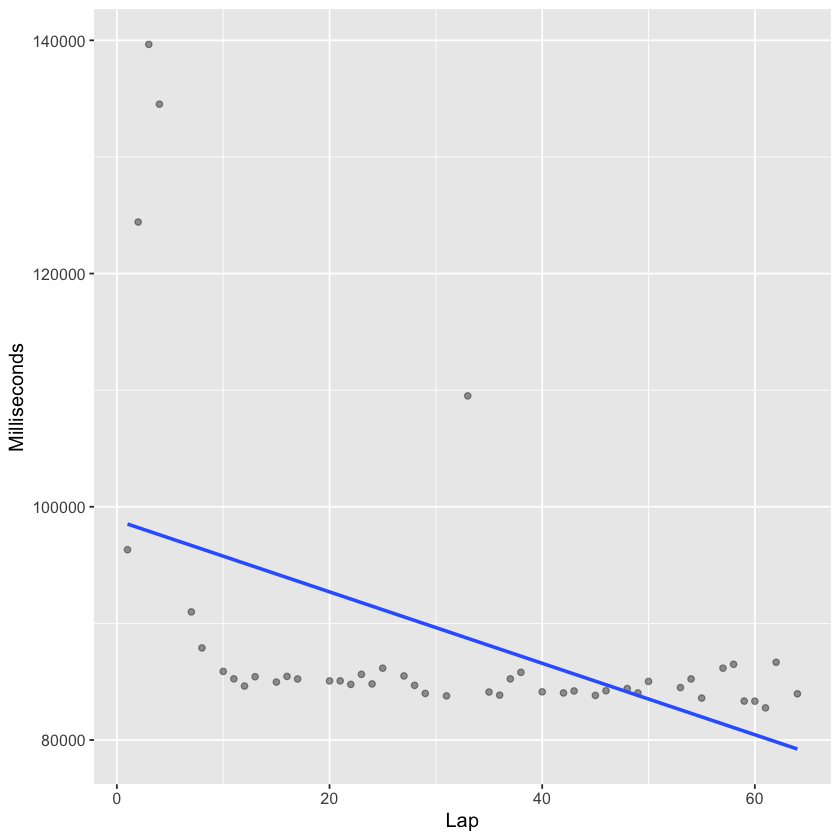

In [7]:
set.seed(2022)

#2. Portimão

ms_Portimão <- msc_laps %>%
                filter(raceId %in% Portimão_race_ID) 

ms_Portimão_clean <- ms_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_Portimão_clean
ms_Portimão_clean_ID <- ms_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_Portimão_races <- msc_laps %>%
                    filter(raceId %in% ms_Portimão_clean_ID) 

formulaone_split <- initial_split(ms_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
880,115
900,99
948,73
1010,29
989,24
969,13
860,1


`geom_smooth()` using formula 'y ~ x'



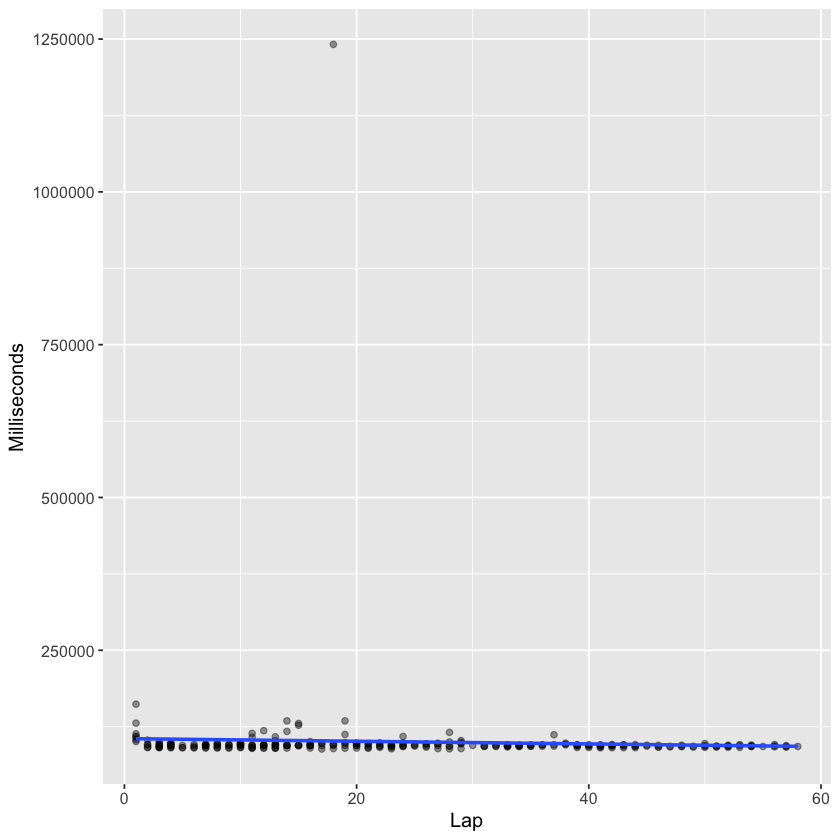

In [8]:
set.seed(2022)

#3. Australia

ms_aus <- haas_lap %>%
                filter(raceId %in% aus_race_ID) 

ms_aus_clean <- ms_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_aus_clean
ms_aus_clean_ID <- ms_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_aus_races <- haas_lap %>%
                    filter(raceId %in% ms_aus_clean_ID)

formulaone_split <- initial_split(ms_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 
 
### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1053,61


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



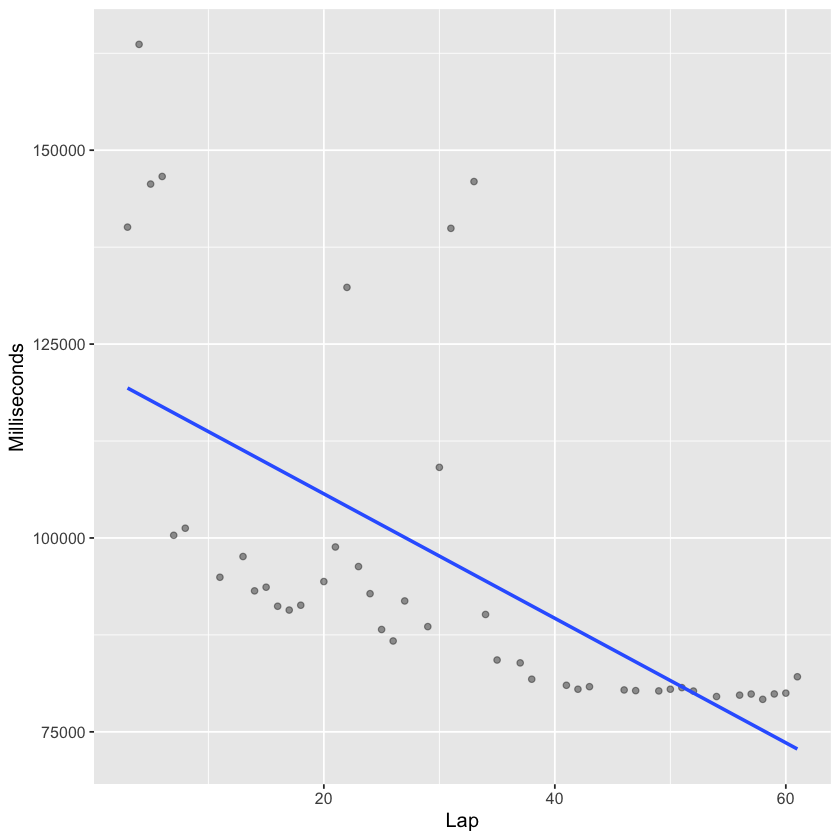

In [9]:
set.seed(2022)

#4. Italy, Imola

ms_imola <- msc_laps %>%
                filter(raceId %in% imola_race_ID) 

ms_imola_clean <- ms_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_imola_clean
ms_imola_clean_ID <- ms_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_imola_races <- msc_laps %>%
                    filter(raceId %in% ms_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 
 
### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1067,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



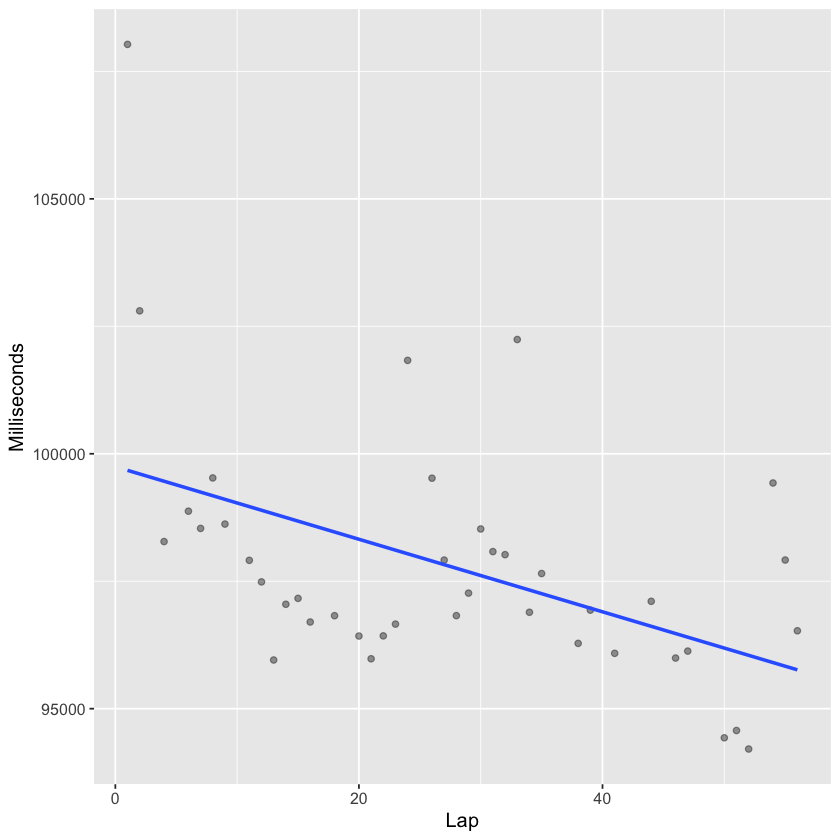

In [10]:
set.seed(2022)

#5. Turkey (Replacing Miami)

ms_turkey <- msc_laps %>%
                filter(raceId %in% turkey_race_ID) 

ms_turkey_clean <- ms_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_turkey_clean
ms_turkey_clean_ID <- ms_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_turkey_races <- msc_laps %>%
                    filter(raceId %in% ms_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 
 
### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
1055,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



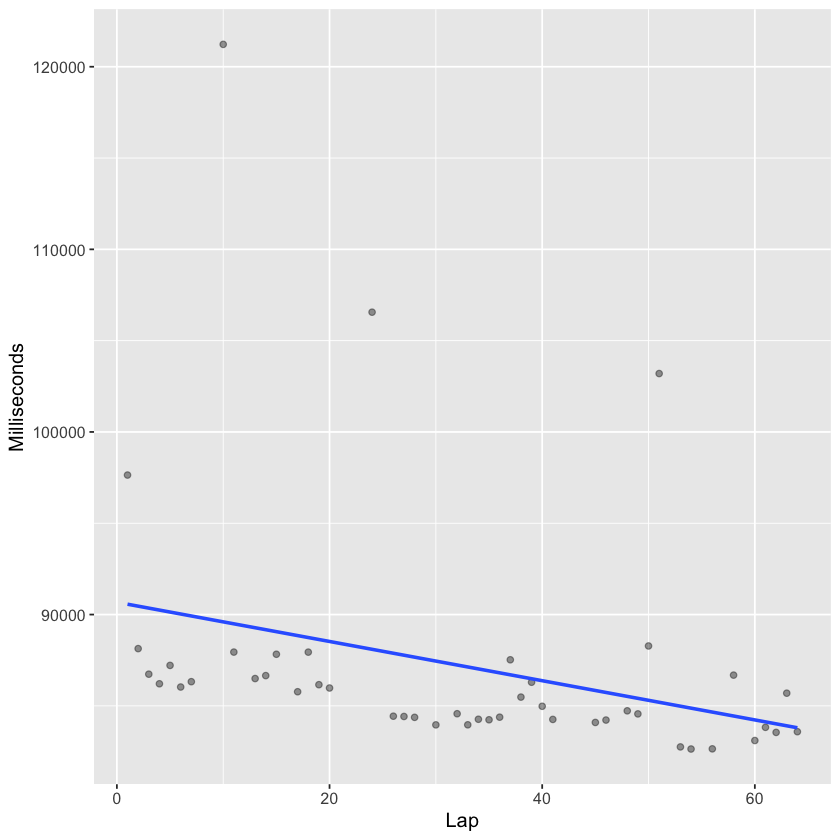

In [11]:
set.seed(2022)

#6. Spain

ms_spain <- msc_laps %>%
                filter(raceId %in% spain_race_ID) 

ms_spain_clean <- ms_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_spain_clean
ms_spain_clean_ID <- ms_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_spain_races <- msc_laps %>%
                    filter(raceId %in% ms_spain_clean_ID)

formulaone_split <- initial_split(ms_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
1056,75


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



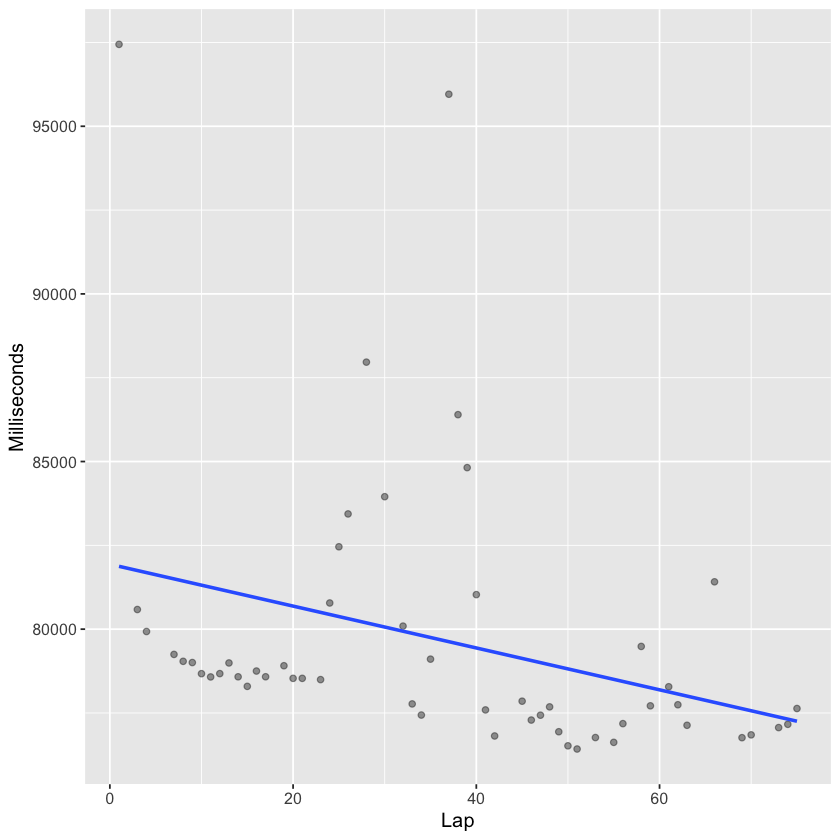

In [12]:
set.seed(2022)

#7. Monaco

ms_monaco <- msc_laps %>%
                filter(raceId %in% monaco_race_ID) 

ms_monaco_clean <- ms_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_monaco_clean
ms_monaco_clean_ID <- ms_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monaco_races <- msc_laps %>%
                    filter(raceId %in% ms_monaco_clean_ID)

formulaone_split <- initial_split(ms_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



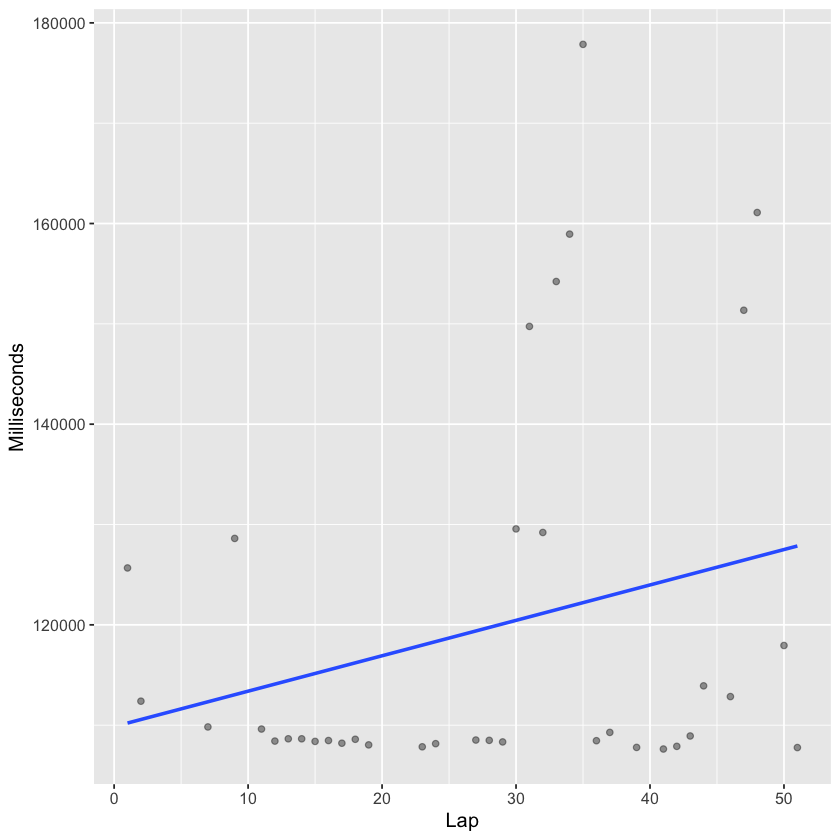

In [13]:
set.seed(2022)

#8. Azerbaijan

ms_azerbaijan <- msc_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ms_azerbaijan_clean <- ms_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_azerbaijan_clean
ms_azerbaijan_clean_ID <- ms_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_azerbaijan_races <- msc_laps %>%
                    filter(raceId %in% ms_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
954,136
886,132
906,123
866,70
932,69
975,69
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



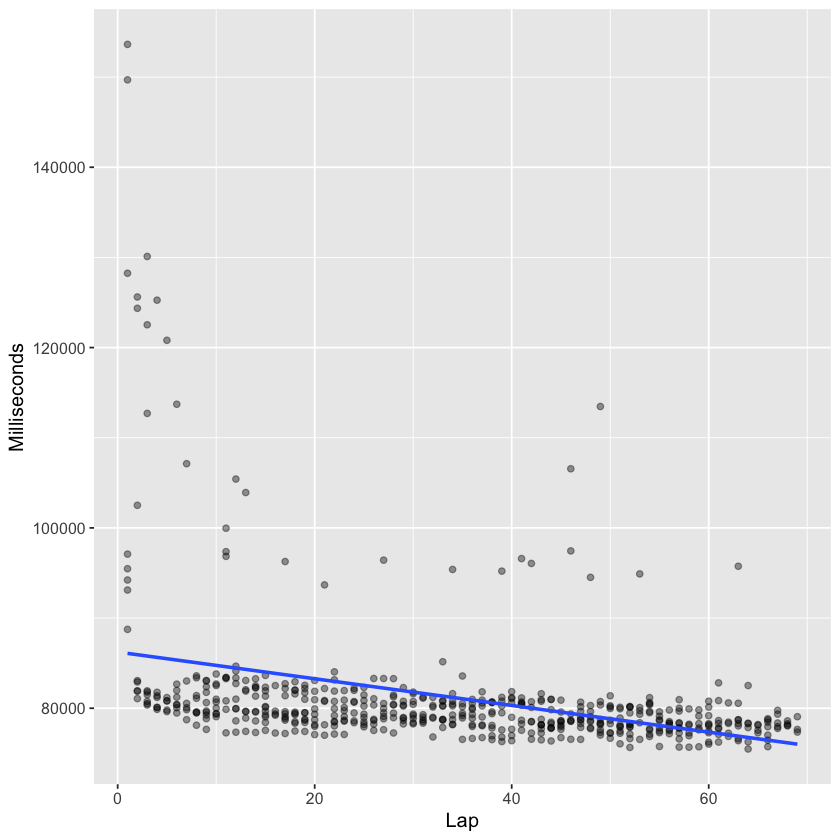

In [14]:
set.seed(2022)

#9. Canada

ms_canada <- haas_lap %>%
                filter(raceId %in% canada_race_ID) 

ms_canada_clean <- ms_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_canada_clean
ms_canada_clean_ID <- ms_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_canada_races <- haas_lap %>%
                    filter(raceId %in% ms_canada_clean_ID)

formulaone_split <- initial_split(ms_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

raceId,n
<dbl>,<int>
1061,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



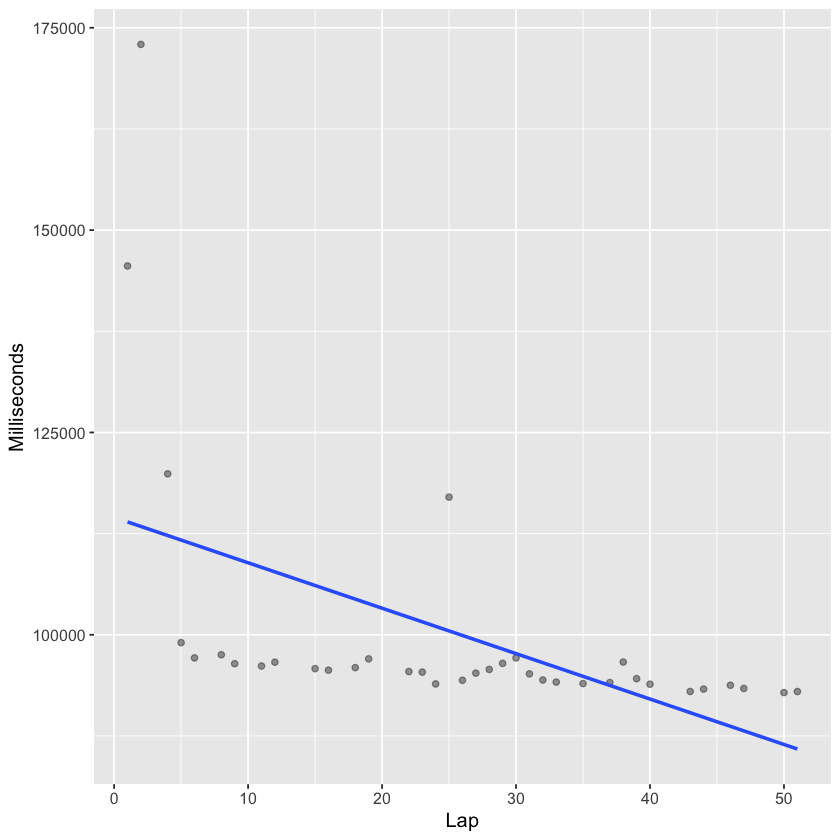

In [15]:
set.seed(2022)

#10. Great Britain

ms_uk <- msc_laps %>%
                filter(raceId %in% uk_race_ID) 

ms_uk_clean <- ms_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uk_clean
ms_uk_clean_ID <- ms_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uk_races <- msc_laps %>%
                    filter(raceId %in% ms_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

raceId,n
<dbl>,<int>
1058,69
1060,69


`geom_smooth()` using formula 'y ~ x'



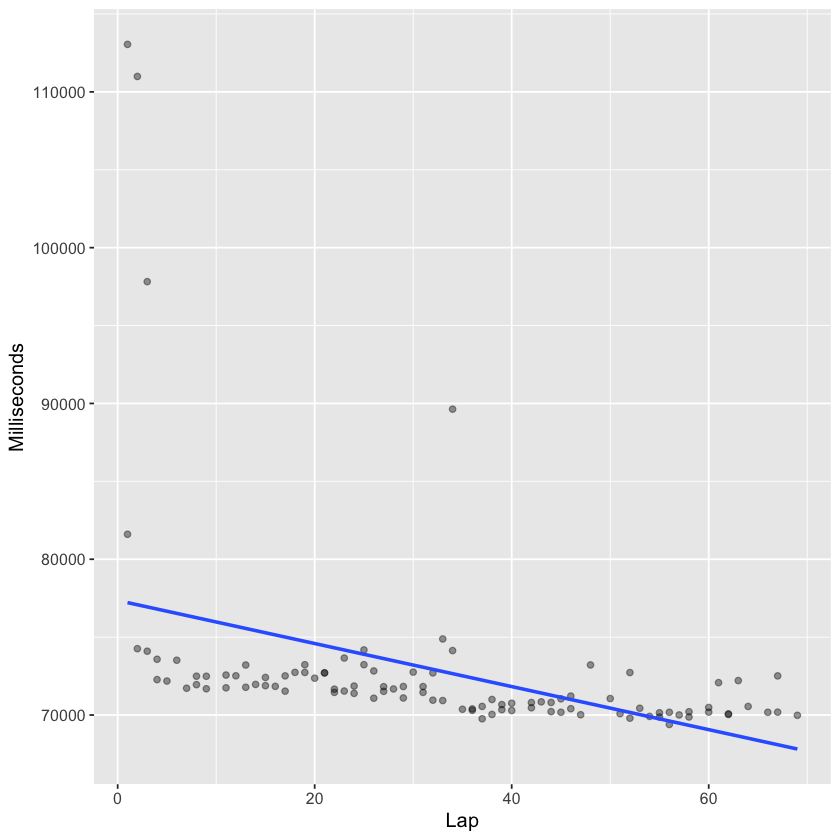

In [16]:
set.seed(2022)

#11. Austria

ms_austria <- msc_laps %>%
                filter(raceId %in% austria_race_ID) 

ms_austria_clean <- ms_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austria_clean
ms_austria_clean_ID <- ms_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austria_races <- msc_laps %>%
                    filter(raceId %in% ms_austria_clean_ID)

formulaone_split <- initial_split(ms_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,52
1059,52
1017,44


`geom_smooth()` using formula 'y ~ x'



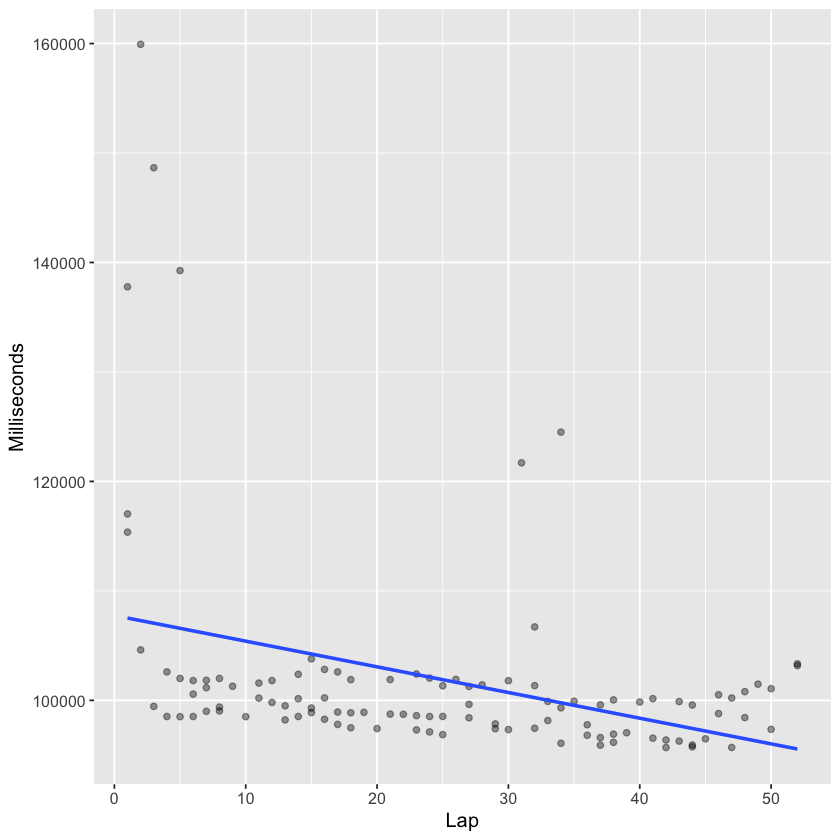

In [17]:
set.seed(2022)

#12. France

ms_france <- haas_lap %>%
                filter(raceId %in% france_race_ID) 

ms_france_clean <- ms_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_france_clean
ms_france_clean_ID <- ms_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_france_races <- haas_lap %>%
                    filter(raceId %in% ms_france_clean_ID)

formulaone_split <- initial_split(ms_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

raceId,n
<dbl>,<int>
1062,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



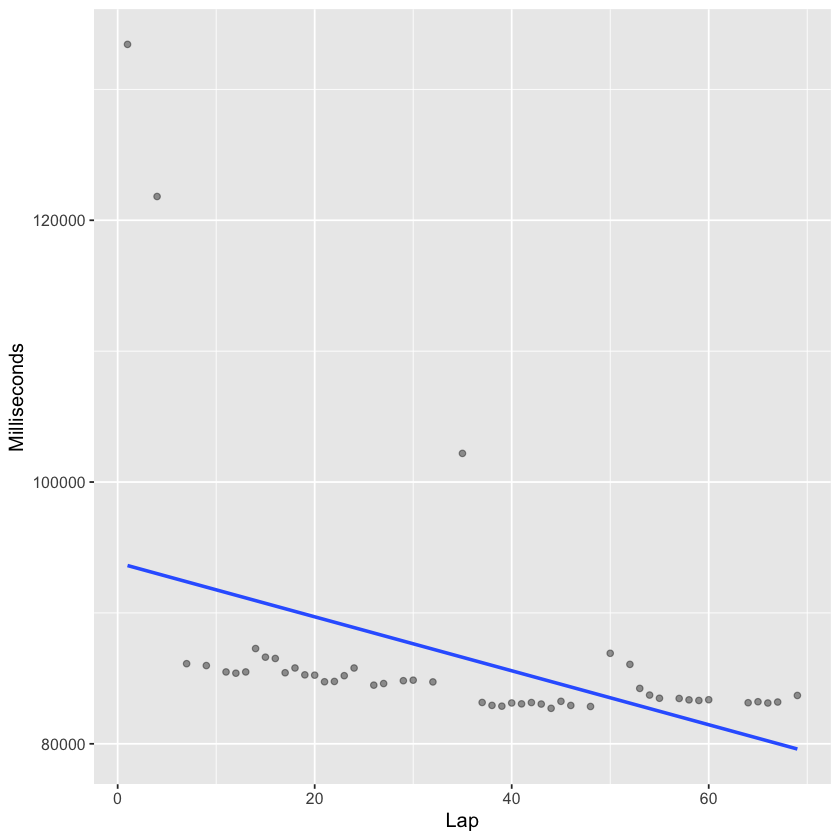

In [18]:
set.seed(2022)

#13. Hungary

ms_hungary <- msc_laps %>%
                filter(raceId %in% hungary_race_ID) 

ms_hungary_clean <- ms_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
ms_hungary_clean
ms_hungary_clean_ID <- ms_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_hungary_races <- msc_laps %>%
                    filter(raceId %in% ms_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ms_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
891,88
960,88
911,77
980,44
1001,44
1037,44
937,43
1022,43
1063,1


`geom_smooth()` using formula 'y ~ x'



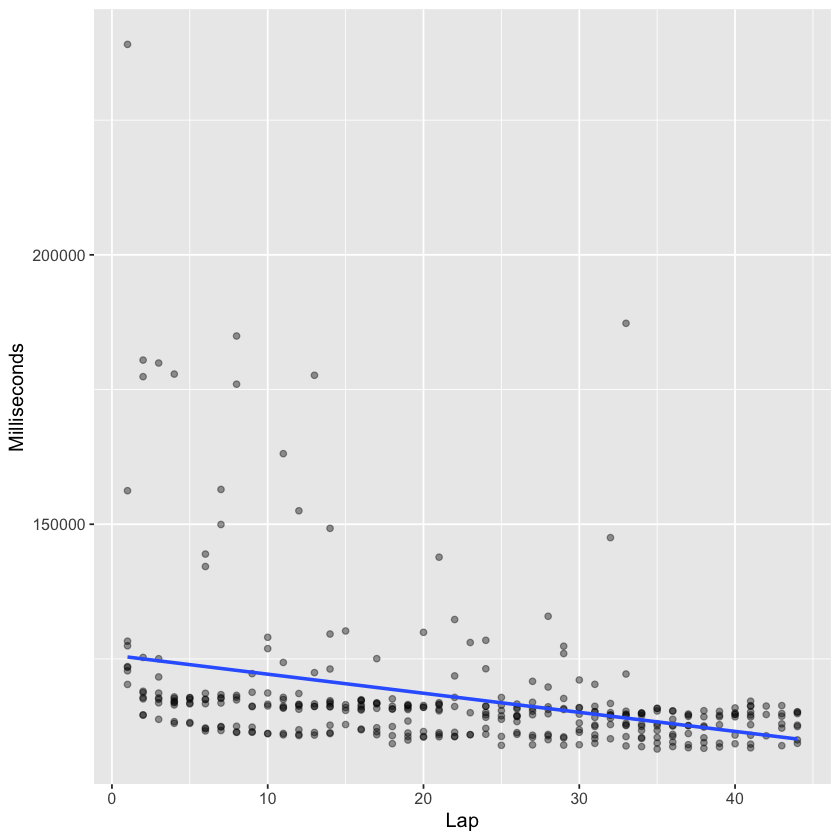

In [19]:
set.seed(2022)

#14. Belgium

ms_belgium <- haas_lap %>%
                filter(raceId %in% belgium_race_ID) 

ms_belgium_clean <- ms_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_belgium_clean
ms_belgium_clean_ID <- ms_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_belgium_races <- haas_lap %>%
                    filter(raceId %in% ms_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ms_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



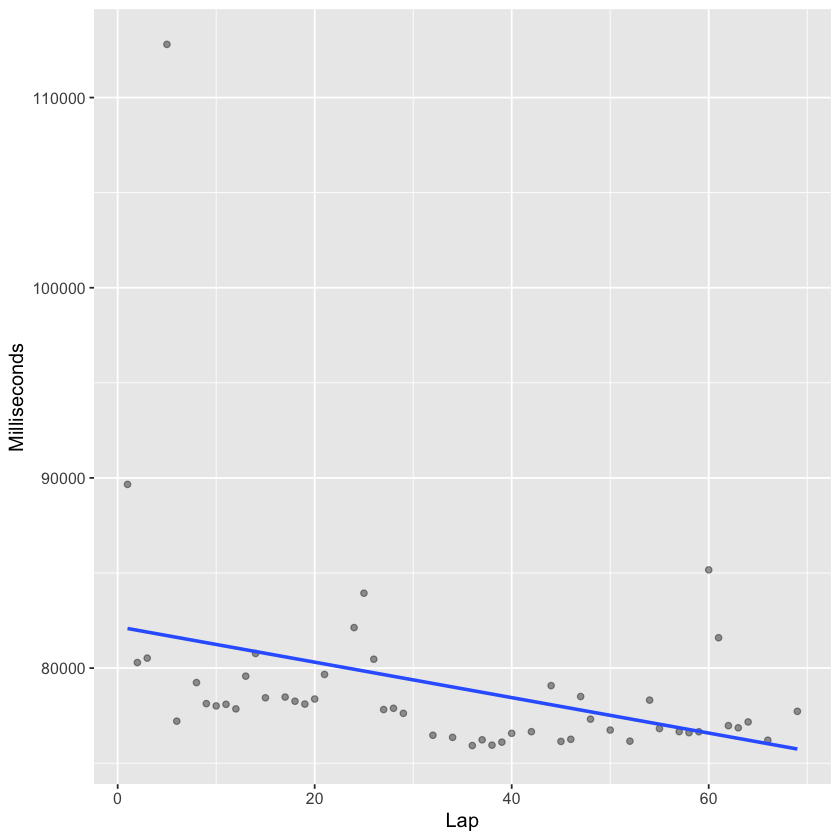

In [20]:
set.seed(2022)

#15. Netherlands

ms_netherlands <- msc_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ms_netherlands_clean <- ms_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_netherlands_clean
ms_netherlands_clean_ID <- ms_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_netherlands_races <- msc_laps %>%
                    filter(raceId %in% ms_netherlands_clean_ID)

formulaone_split <- initial_split(ms_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
1065,53


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



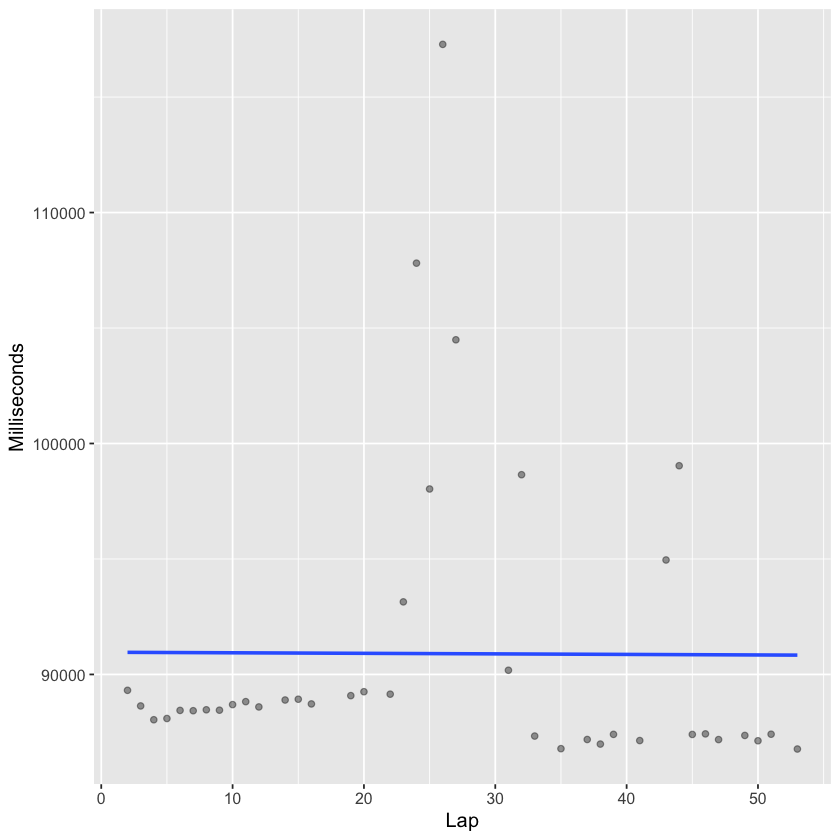

In [21]:
set.seed(2022)

#16. Italy, Monza

ms_monza <- msc_laps %>%
                filter(raceId %in% monza_race_ID) 

ms_monza_clean <- ms_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_monza_clean
ms_monza_clean_ID <- ms_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monza_races <- msc_laps %>%
                    filter(raceId %in% ms_monza_clean_ID)

formulaone_split <- initial_split(ms_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

raceId,n
<dbl>,<int>
893,98
913,77
1024,61
962,60
1003,60
873,59
939,59
982,58
14,3


`geom_smooth()` using formula 'y ~ x'



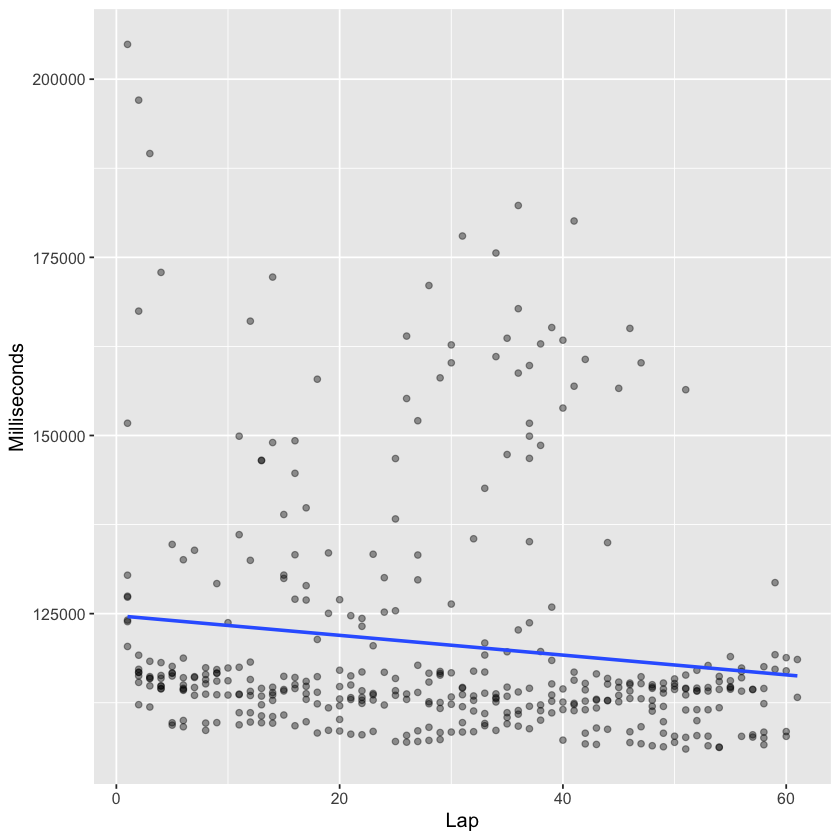

In [22]:
set.seed(2022)

#17. Singapore

ms_singapore <- haas_lap %>%
                filter(raceId %in% singapore_race_ID) 

ms_singapore_clean <- ms_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_singapore_clean
ms_singapore_clean_ID <- ms_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_singapore_races <- haas_lap %>%
                    filter(raceId %in% ms_singapore_clean_ID)

formulaone_split <- initial_split(ms_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

raceId,n
<dbl>,<int>
895,106
964,105
914,86
940,53
984,53
1005,53
15,52
874,51
1026,51


`geom_smooth()` using formula 'y ~ x'



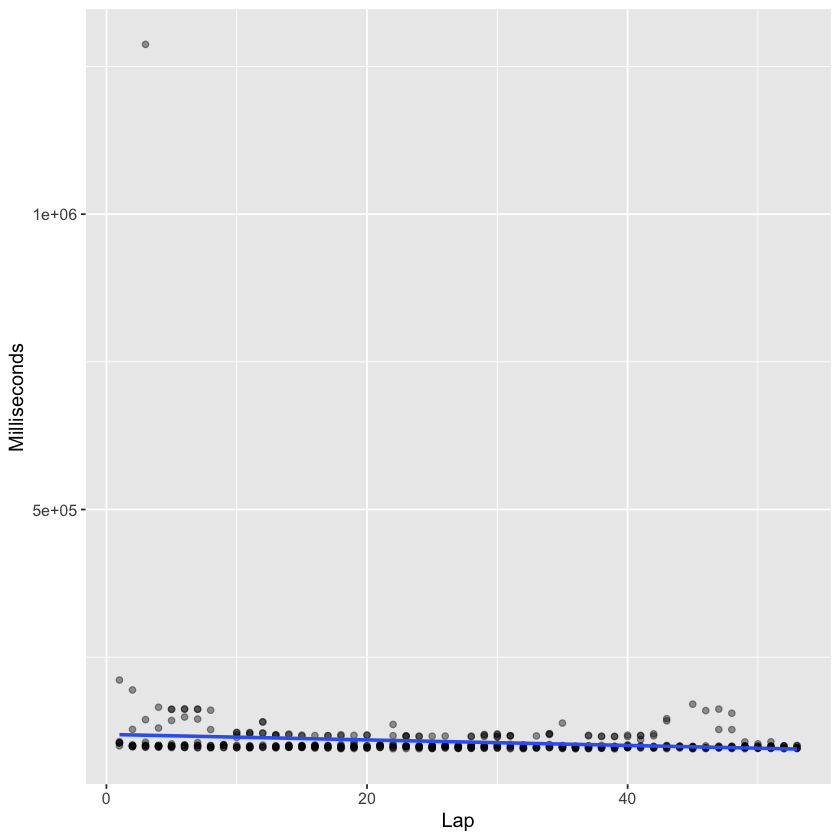

In [23]:
set.seed(2022)

#18. Japan

ms_japan <- haas_lap %>%
                filter(raceId %in% japan_race_ID) 

ms_japan_clean <- ms_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_japan_clean
ms_japan_clean_ID <- ms_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_japan_races <- haas_lap %>%
                    filter(raceId %in% ms_japan_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

raceId,n
<dbl>,<int>
1069,54


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



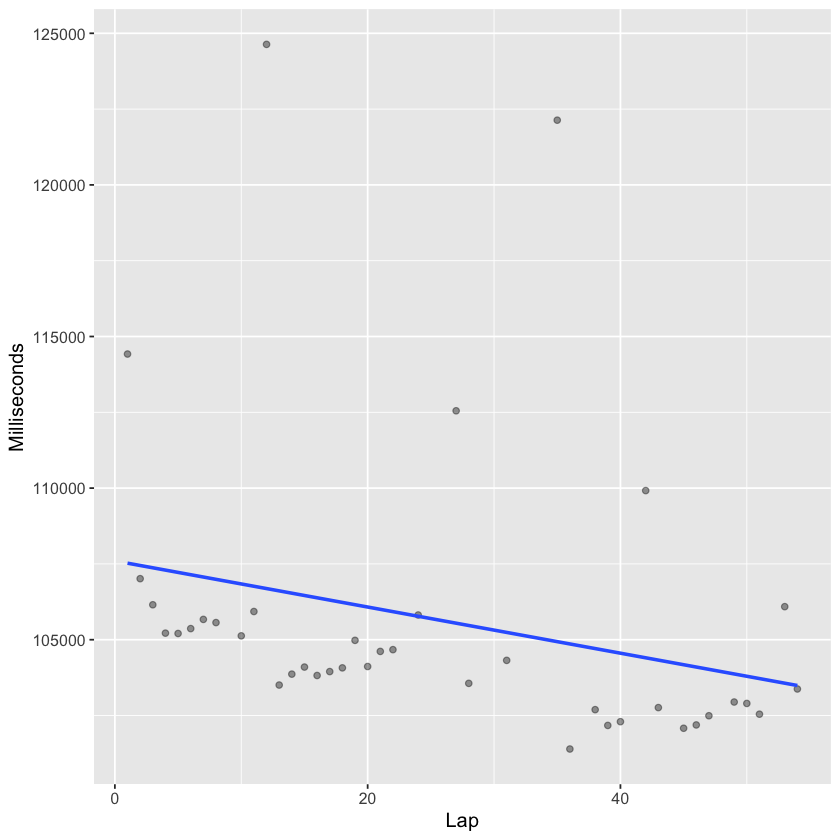

In [24]:
set.seed(2022)

#19. USA, Austin

ms_austin <- msc_laps %>%
                filter(raceId %in% austin_race_ID) 

ms_austin_clean <- ms_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austin_clean
ms_austin_clean_ID <- ms_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austin_races <- msc_laps %>%
                    filter(raceId %in% ms_austin_clean_ID)

formulaone_split <- initial_split(ms_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

raceId,n
<dbl>,<int>
966,140
943,71
986,69
1027,69
1007,68
1070,68


`geom_smooth()` using formula 'y ~ x'



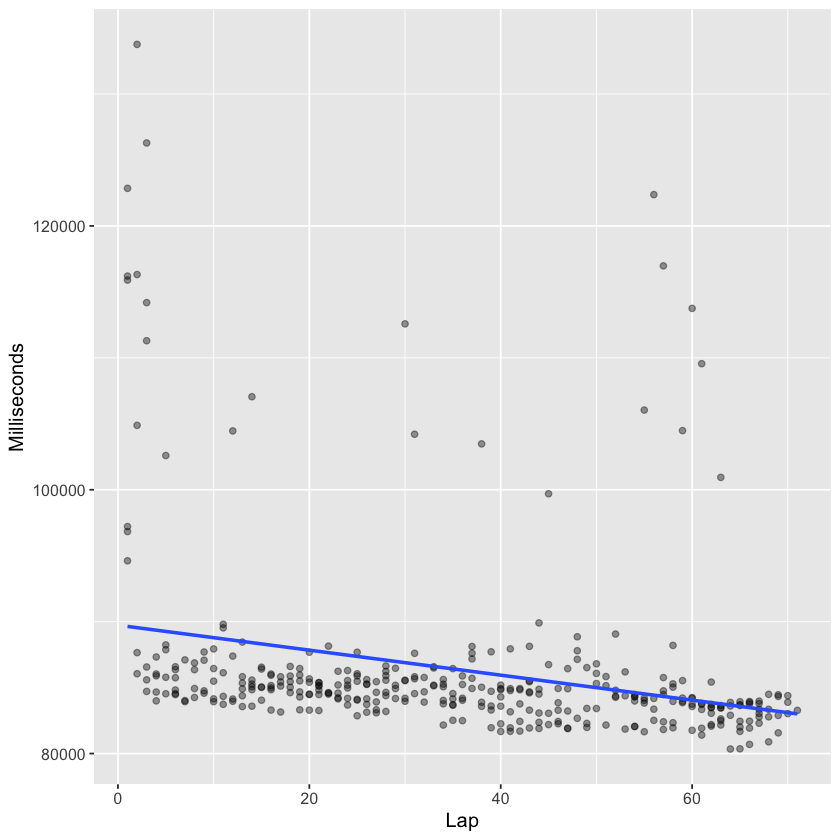

In [25]:
set.seed(2022)

#20. Mexico

ms_mexico <- haas_lap %>%
                filter(raceId %in% mexico_race_ID) 

ms_mexico_clean <- ms_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_mexico_clean
ms_mexico_clean_ID <- ms_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_mexico_races <- haas_lap %>%
                    filter(raceId %in% ms_mexico_clean_ID)

formulaone_split <- initial_split(ms_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

raceId,n
<dbl>,<int>
1071,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



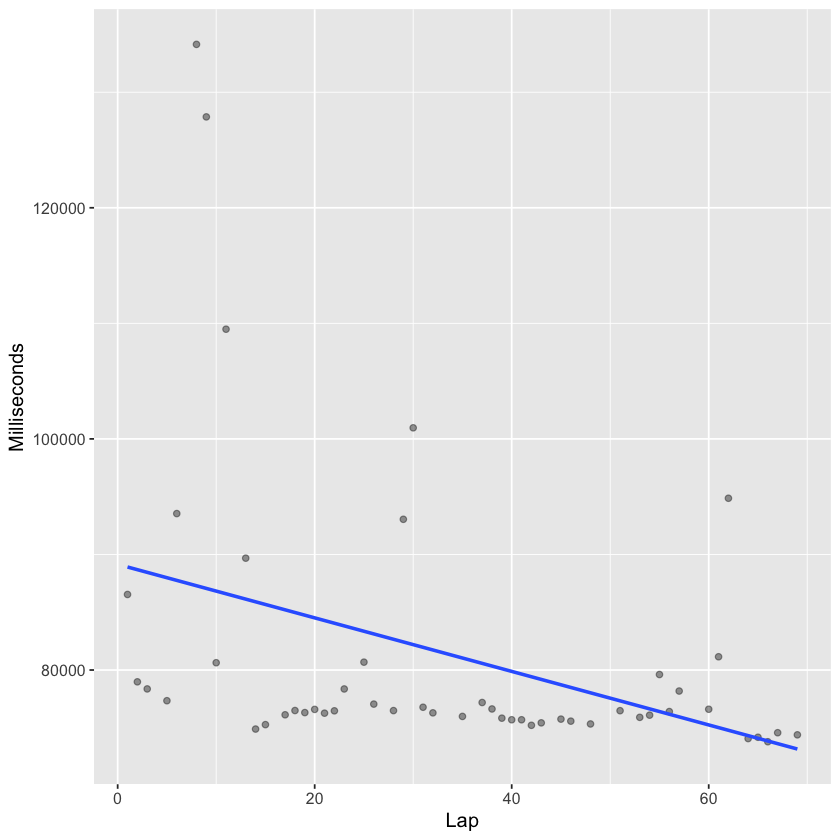

In [26]:
set.seed(2022)

#21. Brazil

ms_brazil <- msc_laps %>%
                filter(raceId %in% brazil_race_ID) 

ms_brazil_clean <- ms_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_brazil_clean
ms_brazil_clean_ID <- ms_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_brazil_races <- msc_laps %>%
                    filter(raceId %in% ms_brazil_clean_ID)

formulaone_split <- initial_split(ms_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
897,110
968,110
918,108
945,55
17,54
988,54
1009,54
1030,54
877,37


`geom_smooth()` using formula 'y ~ x'



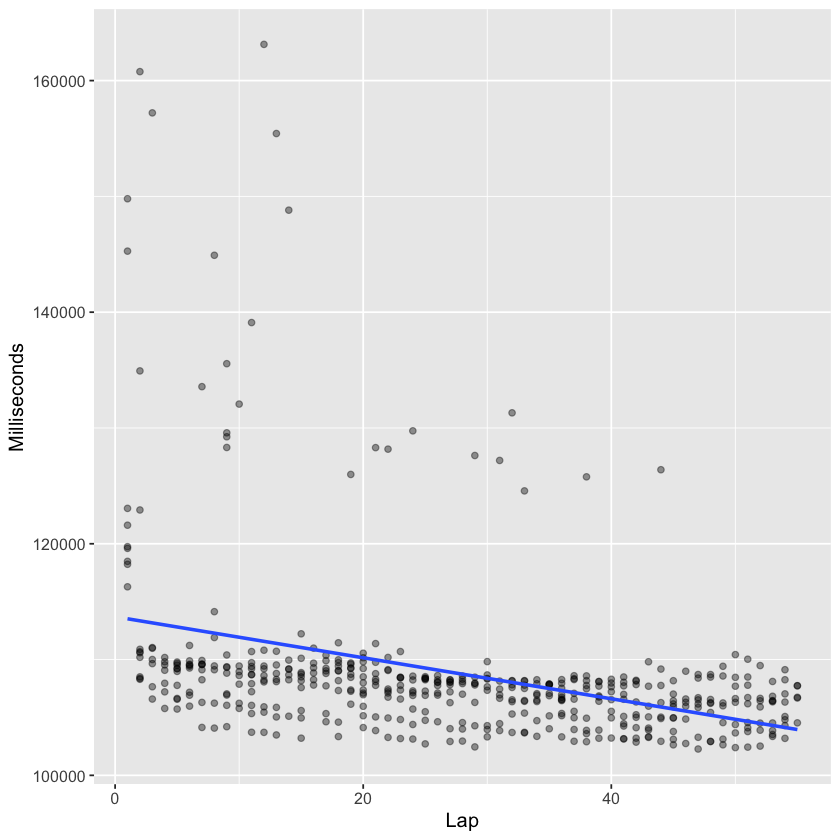

In [27]:
set.seed(2022)

#22. Abu Dhabi

ms_uae <- haas_lap %>%
                filter(raceId %in% uae_race_ID) 

ms_uae_clean <- ms_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uae_clean
ms_uae_clean_ID <- ms_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uae_races <- haas_lap %>%
                    filter(raceId %in% ms_uae_clean_ID)

formulaone_split <- initial_split(ms_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [29]:
rmse_col
racetime_col

write_csv(rmse_col, "final_rmse_data/ms_rmse.csv")
write_csv(racetime_col, "final_race_data/ms_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,4535.857,1
rmse,standard,8048.297,2
rmse,standard,8199.301,3
rmse,standard,11741.675,4
rmse,standard,1233.688,5
rmse,standard,6394.462,6
rmse,standard,3709.885,7
rmse,standard,8423.719,8
rmse,standard,7978.895,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5801134,96.68557,1.611426,1
5845508,97.42513,1.623752,2
5747372,95.78954,1.596492,3
6051803,100.86339,1.681057,4
5567931,92.79884,1.546647,5
5747062,95.78437,1.596406,6
6198698,103.31163,1.721860,7
6070793,101.17989,1.686331,8
5668404,94.47340,1.574557,9
